# Challenge: Analyzing Text about Data Science

> *In this notebook, we experiment with using different URL - wikipedia article on Machine Learning. You can see that, unlike Data Science, this article contains a lot of terms, this making the analysis more problematic. We need to come up with another way to clean up the data after doing keyword extraction, to get rid of some frequent, but not meaningful word combinations.*

In [8]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Step 1: Getting the Data

First step in every data science process is getting the data. We will use `requests` library to do that:

In [9]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"a6d6dfba-dfd1-423d-8672-7721daa8bb63","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1059034200,"wgRevisionId":1059034200,"wgArticleId":233488,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","CS1 maint: uses authors parameter","Articles with short description","Short description is different from Wikida

## Step 2: Transforming the Data

The next step is to convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from the page, and we need to convert it into plain text.

There are many ways this can be done. We will use the simplest build-in [HTMLParser](https://docs.python.org/3/library/html.parser.html) object from Python. We need to subclass the `HTMLParser` class and define the code that will collect all text inside HTML tags, except `<script>` and `<style>` tags.

## Step 3: Getting Insights

The most important step is to turn our data into some for from which we can draw insights. In our case, we want to extract keywords from the text, and see which keywords are more meaningful.

We will use Python library called [RAKE](https://github.com/aneesha/RAKE) for keyword extraction. First, let's install this library in case it is not present:

In [6]:
import sys
!{sys.executable} -m pip install nlp_rake

The main functionality is available from `Rake` object, which we can customize using some parameters. In our case, we will set the minimum length of a keyword to 5 characters, minimum frequency of a keyword in the document to 3, and maximum number of words in a keyword - to 2. Feel free to play around with other values and observe the result.

In [10]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('cs1 maint', 4.0),
 ('authors parameter', 4.0),
 ('short description', 4.0),
 ('><div id=', 4.0),
 ('data mining', 4.0),
 ('><img alt=', 4.0),
 ('anomaly detection', 4.0),
 ('dimensionality reduction', 4.0),
 ('external text', 4.0),
 ('><style data-mw-deduplicate=', 4.0),
 ('sidebar-list-content mw-collapsible-content', 4.0),
 ('><link rel=', 4.0),
 ('<sup id=', 4.0),
 ('speech recognition', 4.0),
 ('>speech recognition</a>', 4.0),
 ('>computer vision</a>', 4.0),
 ('>data mining</a>', 4.0),
 ('>unsupervised learning</a>', 4.0),
 ('</a></sup><sup id=', 4.0),
 ('thumb tright', 4.0),
 ('/ location', 4.0),
 ('>supervised learning</a>', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('algorithmic bias', 4.0),
 ('test set', 4.0),
 ('<a rel=', 4.0),
 ('mcgraw hill', 4.0),
 ('<link rel=', 4.0),
 ('/><cite id=', 4.0),
 ('><a rel=', 4.0),
 ('freely accessible', 4.0),
 ('prentice hall', 4.0),
 ('>machine learning</a></i>', 4.0),
 ('mit press', 4.0),
 ('>cs1 maint', 4.0),
 ('<i><a rel='


We obtained a list terms together with associated degree of importance. As you can see, the most relevant disciplines, such as machine learning and big data, are present in the list at top positions.

## Step 4: Visualizing the Result

People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights. We can use `matplotlib` library in Python to plot simple distribution of the keywords with their relevance:

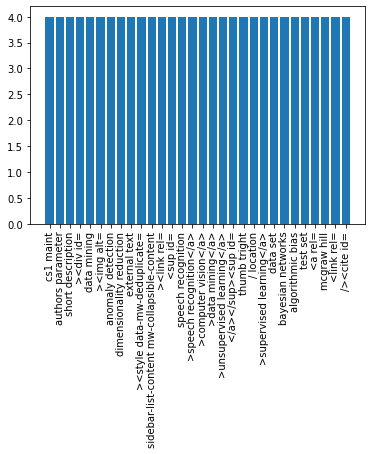

In [12]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

There is, however, even better way to visualize word frequencies - using **Word Cloud**. We will need to install another library to plot the word cloud from our keyword list.

In [13]:
!{sys.executable} -m pip install wordcloud

     |████████████████████████████████| 371 kB 1.6 MB/s eta 0:00:01


`WordCloud` object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using `matplotlib`:

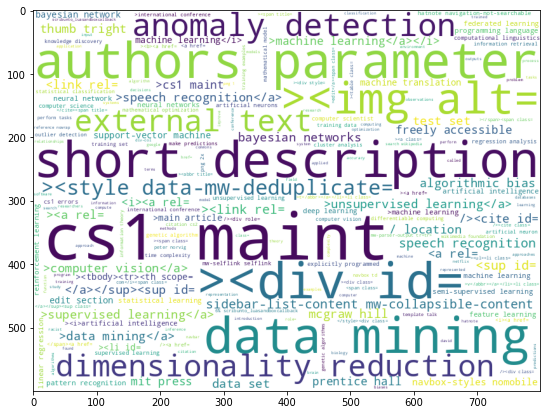

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

We can also pass in the original text to `WordCloud` - let's see if we are able to get similar result:

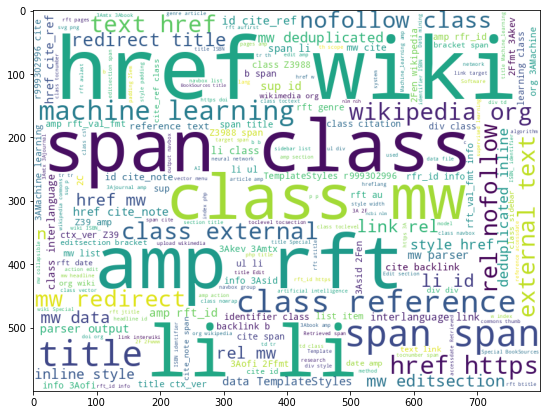

In [15]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()